#Implementation of Linear Regression Practical


In [ ]:
# importing necessary libraries and datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [ ]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

In [ ]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
df_copy = df.sample(frac=0.25)

In [ ]:
df_copy.shape

(5160, 8)

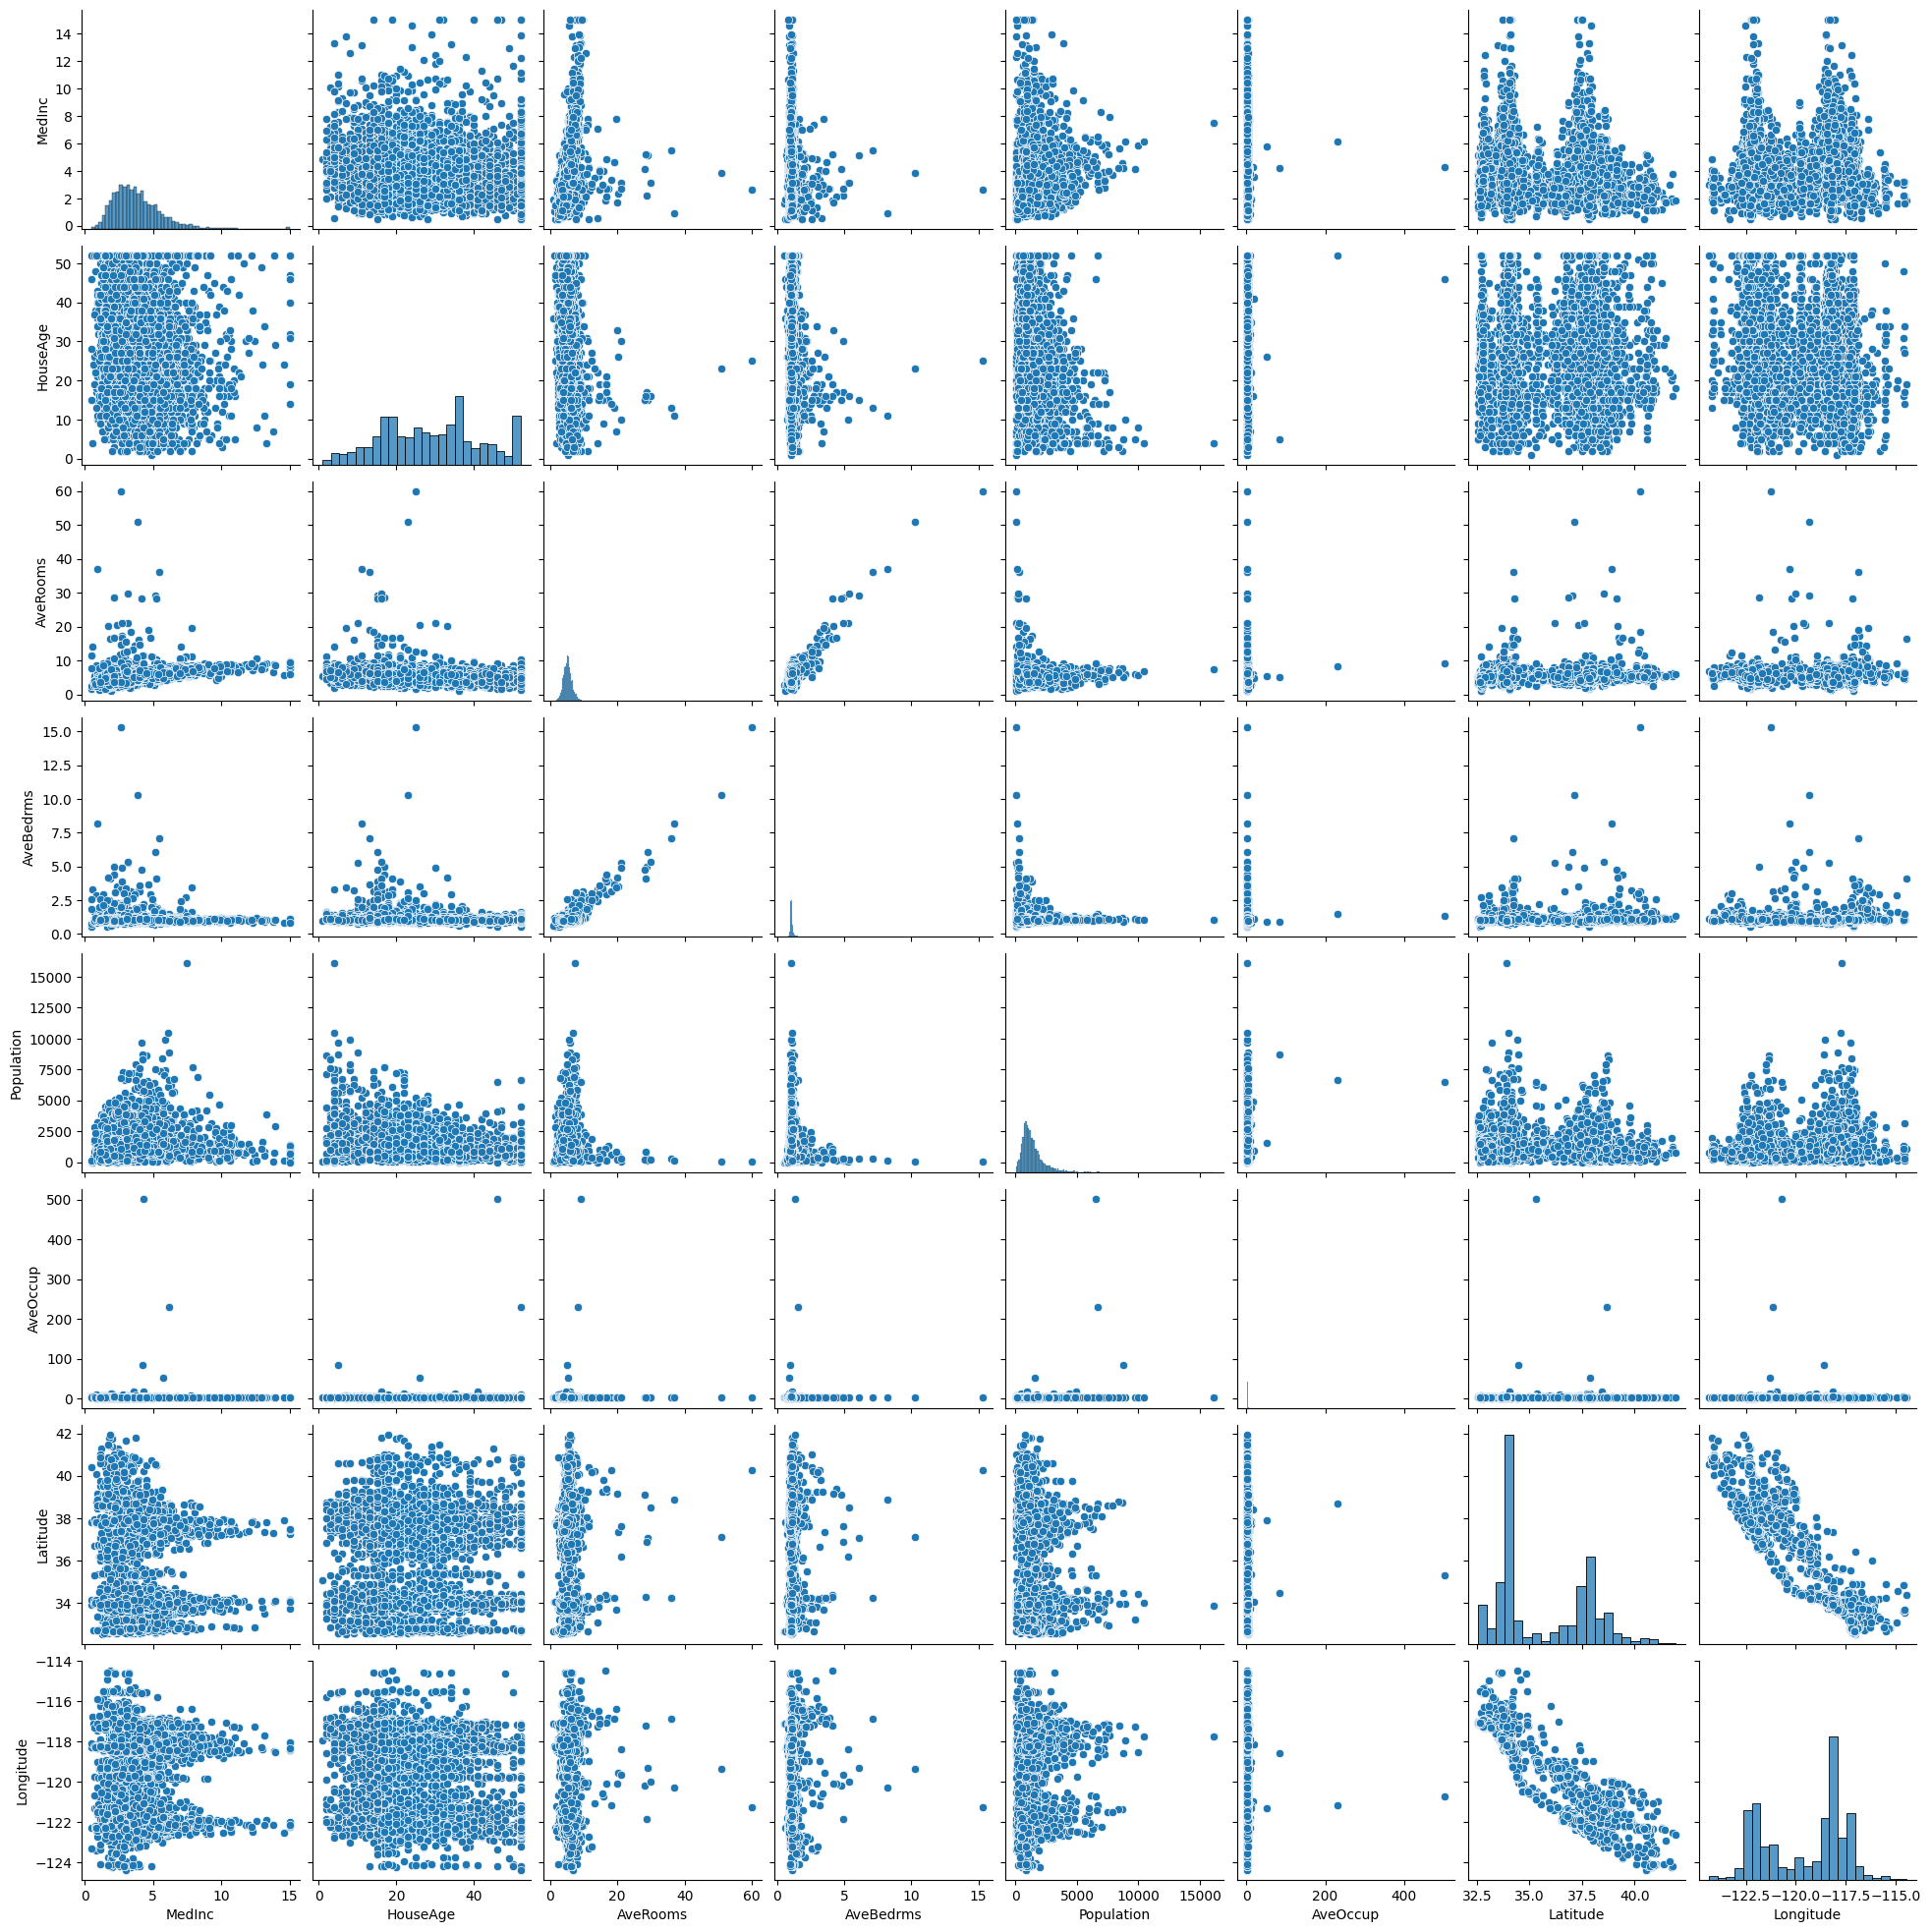

In [ ]:
sns.pairplot(df_copy)

Steps Should Follow:

1. Divide the dataset into independent and dependent features. (X, y)
2. Split the dataset into train and test.
3. Feature scaling. (standard scalar)
4. Model Training.
5. Model Testing.

In [ ]:
#Divide the dataset into independent and dependent
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 36)

In [ ]:
X.shape

(20640, 7)

In [ ]:
X_train.shape, X_test.shape

((13828, 7), (6812, 7))

# Feature Scaling (Standard Scaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
regression.coef_

array([-2.09375314e-01, -1.63288450e-02,  2.07992860e-01, -7.04203356e-01,
       -4.84354142e-05,  3.38085445e-03, -8.98296856e-01])

In [ ]:
regression.intercept_

-86.57877273298786

# Prediction

In [ ]:
y_pred = regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(np.sqrt(mse))

1089.9625529426055
32.98803540150483
33.01458091423554


# Numpy

In [ ]:
# 1D array
a1 = np.array([1,2,3,4])
a1

array([1, 2, 3, 4])

In [ ]:
a1.shape

(4,)

In [ ]:
a2 = np.array([[1,2,3,4]])
a2

array([[1, 2, 3, 4]])

In [ ]:
a2.shape

(1, 4)

In [ ]:
a3 = np.array([[1], [2], [3], [4]])
a3.shape

(4, 1)

In [ ]:
M1 = np.array([[1,0,0], [0,1,0], [0,0,1], [0,0,1]])
M1

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
M1.shape

(4, 3)

In [ ]:
m = M1.shape[0] #number of rows
n = M1.shape[1] #number of columns
print("m: {} m: {}".format(m,n))

m: 4 m: 3


In [ ]:
M2 = np.reshape(M1, (1,12))
display(M2)
print(M2.shape)

array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]])

(1, 12)


In [ ]:
print("original a2.shape: ", a1.shape)
# reshape into a vector
a1_vec = np.reshape(a1, (a1.shape[0],1))
print("reshaped: ", a1_vec.shape)

original a2.shape:  (4,)
reshaped:  (4, 1)


In [ ]:
# python list:
l = [1,2,3,4]
# np.array
l_np = np.array(l)
# different print style
print(l)
print(l_np)

[1, 2, 3, 4]
[1 2 3 4]


In [ ]:
# different behaviour! !
print(l*5) #multiply a python list replicates it
print(l_np*5) #numpy applies operation element-wise

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
[ 5 10 15 20]


In [ ]:
# Define two vectors
x = np.array([1,9.0,3,4,5.5,6,7,8.9,10])
y = np.array([1,10,1,10,1,10,1,11,11])
x = np.reshape(x, (x.shape[0],1))
y = np.reshape(y, (y.shape[0],1))
# Verify shapes are correct
assert x.shape == y.shape
print("x.shape: ", x.shape)
print("y.shape: ", x.shape)

x.shape:  (9, 1)
y.shape:  (9, 1)


In [ ]:
# Naive way
t1 = time.time()
res = 0
for i in range(x.shape[0]):
    res += float(x[i]*y[i])
t2 = time.time()
print("Took {} seconds".format(round(t2-t1, 10)))
print("dot: ", res)

Took 0.0002346039 seconds
dot:  414.4


In [ ]:
# The RIGHT way
t1 = time.time()
res = np.dot(x.T,y) # the .T === transpose
t2 = time.time()
print("Took {} seconds".format(round(t2-t1, 10)))
# display
print("res.shape: ", res.shape)
print(float(res)) # cast

Took 0.0001196861 seconds
res.shape:  (1, 1)
414.4


In [ ]:
# Generate two huge arrays
x = np.random.randn(9999, 1)
y = np.random.randn(9999, 1)
# Verify shapes are correct
assert x.shape == y.shape
print("x.shape: ", x.shape)
print("y.shape: ", x.shape)
## 1. Naive Method:
t1 = time.time()
res = 0
for i in range(x.shape[0]):
    res += float(x[i]*y[i])
t2 = time.time()
print("Naive method took {} seconds".format(round(t2-t1, 10)))
## 2. np.dot
## The RIGHT way
t1 = time.time()
res = float(np.dot(x.T,y)) # the .T === transpose
t2 = time.time()
print("Numpy took {} seconds".format(round(t2-t1, 10)))

x.shape:  (9999, 1)
y.shape:  (9999, 1)
Naive method took 0.0201346874 seconds
Numpy took 0.0001387596 seconds


In [ ]:
# generate based on normal distribution
M3 = np.random.randn(5,5)
M3

array([[-0.38195435,  0.0131979 ,  0.40690716,  0.65094267,  1.15180701],
       [-0.9829276 ,  0.673343  ,  0.2400837 ,  1.20472388, -2.19138645],
       [-1.26763064, -0.18363838, -0.7392043 ,  1.10726486, -0.55195821],
       [ 0.20017511,  0.4284928 ,  0.10488625,  0.27750357,  1.08261509],
       [ 0.41928033, -1.84463384,  1.36659276, -2.35061176, -0.20791987]])

In [ ]:
# Ex. initialize random 10-dimensional column vector
n = 10
theta = np.random.randn(n,1)
theta

array([[-1.84837283e+00],
       [-2.05282960e-01],
       [ 1.72665228e+00],
       [-1.13402374e+00],
       [ 9.25156375e-01],
       [-6.83322487e-01],
       [ 4.13043816e-01],
       [ 7.22208035e-04],
       [-4.84407650e-01],
       [-5.95801159e-01]])

In [ ]:
# set up a random seed
np.random.seed(42) # this is the meaning of life , the universe and everything
M4 = np.random.randn(10,5)
M4

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337],
       [-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272],
       [ 0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491],
       [-1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199],
       [-0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016]])

# Pandas

In [ ]:
# Convert this to a dataframe
df = pd.DataFrame(M4)
df

0         1         2         3         4
0  0.496714 -0.138264  0.647689  1.523030 -0.234153
1 -0.234137  1.579213  0.767435 -0.469474  0.542560
2 -0.463418 -0.465730  0.241962 -1.913280 -1.724918
3 -0.562288 -1.012831  0.314247 -0.908024 -1.412304
4  1.465649 -0.225776  0.067528 -1.424748 -0.544383
5  0.110923 -1.150994  0.375698 -0.600639 -0.291694
6 -0.601707  1.852278 -0.013497 -1.057711  0.822545
7 -1.220844  0.208864 -1.959670 -1.328186  0.196861
8  0.738467  0.171368 -0.115648 -0.301104 -1.478522
9 -0.719844 -0.460639  1.057122  0.343618 -1.763040

In [ ]:
# access the columns attribute
df.columns

RangeIndex(start=0, stop=5, step=1)

In [ ]:
# re-assign
df.columns = ["col1", "col2", "col3", "col4", "col5"]

In [ ]:
col3 = df["col3"]  # bracket notation
# col3 = df.col3
col3

0    0.647689
1    0.767435
2    0.241962
3    0.314247
4    0.067528
5    0.375698
6   -0.013497
7   -1.959670
8   -0.115648
9    1.057122
Name: col3, dtype: float64

In [ ]:

type(col3)

pandas.core.series.Series

In [ ]:
col3.describe()

count    10.000000
mean      0.138287
std       0.822706
min      -1.959670
25%       0.006759
50%       0.278105
75%       0.579691
max       1.057122
Name: col3, dtype: float64

In [ ]:
df_subset = df[["col1","col2"]] # double square brackets
df_subset

col1      col2
0  0.496714 -0.138264
1 -0.234137  1.579213
2 -0.463418 -0.465730
3 -0.562288 -1.012831
4  1.465649 -0.225776
5  0.110923 -1.150994
6 -0.601707  1.852278
7 -1.220844  0.208864
8  0.738467  0.171368
9 -0.719844 -0.460639

In [ ]:
df_subset = df[["col3","col1"]] # double square brackets
df_subset

col3      col1
0  0.647689  0.496714
1  0.767435 -0.234137
2  0.241962 -0.463418
3  0.314247 -0.562288
4  0.067528  1.465649
5  0.375698  0.110923
6 -0.013497 -0.601707
7 -1.959670 -1.220844
8 -0.115648  0.738467
9  1.057122 -0.719844

In [ ]:
# come up with some data
M5 = np.array([["no","factor1",0],
               ["yes","factor2",2],
               ["no","factor3",0],
               ["no","factor4",2],
               ["yes","factor1", 1],
               ["no","factor2",3],
               ["yes","factor5",3],
               ["no","factor1",0],
               ["yes","factor5",3],
               ["yes","factor1",2],
               ["yes","factor5",1],
               ["no","factor1",2],
               ["no","factor2",0],
               ["yes","factor1",1],
               ["no","factor3",2]
              ])

# create a dataframe with columns
df2 = pd.DataFrame(M5, columns=["Request","Factor","Impact"])
df2["Impact"] = df2["Impact"].astype(int)
df2

Request   Factor  Impact
0       no  factor1       0
1      yes  factor2       2
2       no  factor3       0
3       no  factor4       2
4      yes  factor1       1
5       no  factor2       3
6      yes  factor5       3
7       no  factor1       0
8      yes  factor5       3
9      yes  factor1       2
10     yes  factor5       1
11      no  factor1       2
12      no  factor2       0
13     yes  factor1       1
14      no  factor3       2

In [ ]:
np.random.seed() # This will fix the random number generation

# create random uniform array of values with compatible shape
cs = np.random.uniform(low=-1,
                       high=1,
                       size=(M5.shape[0])) # create a random array
print(cs.shape)

# Assign array to dataframe
df2["kll_index"] = cs
display(df2)

(15,)


Request   Factor  Impact  kll_index
0       no  factor1       0  -0.016817
1      yes  factor2       2   0.145032
2       no  factor3       0  -0.999712
3       no  factor4       2  -0.730875
4      yes  factor1       1  -0.966787
5       no  factor2       3  -0.680045
6      yes  factor5       3   0.357261
7       no  factor1       0  -0.388321
8      yes  factor5       3  -0.207400
9      yes  factor1       2   0.870166
10     yes  factor5       1   0.702481
11      no  factor1       2  -0.165236
12      no  factor2       0   0.307021
13     yes  factor1       1  -0.924638
14      no  factor3       2  -0.304255

In [ ]:
condition = df2['Request'] == 'no'
condition

0      True
1     False
2      True
3      True
4     False
5      True
6     False
7      True
8     False
9     False
10    False
11     True
12     True
13    False
14     True
Name: Request, dtype: bool

In [ ]:
df2[condition]

Request   Factor  Impact  kll_index
0       no  factor1       0  -0.016817
2       no  factor3       0  -0.999712
3       no  factor4       2  -0.730875
5       no  factor2       3  -0.680045
7       no  factor1       0  -0.388321
11      no  factor1       2  -0.165236
12      no  factor2       0   0.307021
14      no  factor3       2  -0.304255

In [ ]:
df2

Request   Factor  Impact  kll_index
0       no  factor1       0  -0.016817
1      yes  factor2       2   0.145032
2       no  factor3       0  -0.999712
3       no  factor4       2  -0.730875
4      yes  factor1       1  -0.966787
5       no  factor2       3  -0.680045
6      yes  factor5       3   0.357261
7       no  factor1       0  -0.388321
8      yes  factor5       3  -0.207400
9      yes  factor1       2   0.870166
10     yes  factor5       1   0.702481
11      no  factor1       2  -0.165236
12      no  factor2       0   0.307021
13     yes  factor1       1  -0.924638
14      no  factor3       2  -0.304255

In [ ]:
condition1 = df2["Impact"] >= 2
condition2 = df2["kll_index"] < 0
condition3 = df2["Factor"] == "factor1"
df2_subset = df2[(condition1|condition2)&condition3]
df2_subset

Request   Factor  Impact  kll_index
0       no  factor1       0  -0.016817
4      yes  factor1       1  -0.966787
7       no  factor1       0  -0.388321
9      yes  factor1       2   0.870166
11      no  factor1       2  -0.165236
13     yes  factor1       1  -0.924638

In [ ]:
# suppose we have this mapping
mapping = {"factor1":"NA", "factor2":"MX","factor3":"LX","factor4":"TY","factor5":"PSOX"}
# apply the mapping to the Service_type column and create a new one
df2["EDX"] = df2["Factor"].apply(lambda x: mapping.get(x,"Not Found"))
# display result
df2

Request   Factor  Impact  kll_index   EDX
0       no  factor1       0  -0.016817    NA
1      yes  factor2       2   0.145032    MX
2       no  factor3       0  -0.999712    LX
3       no  factor4       2  -0.730875    TY
4      yes  factor1       1  -0.966787    NA
5       no  factor2       3  -0.680045    MX
6      yes  factor5       3   0.357261  PSOX
7       no  factor1       0  -0.388321    NA
8      yes  factor5       3  -0.207400  PSOX
9      yes  factor1       2   0.870166    NA
10     yes  factor5       1   0.702481  PSOX
11      no  factor1       2  -0.165236    NA
12      no  factor2       0   0.307021    MX
13     yes  factor1       1  -0.924638    NA
14      no  factor3       2  -0.304255    LX

In [ ]:
condition = df2["Factor"] == "factor1"
df2.loc[condition, "Request"] = "no"
df2

Request   Factor  Impact  kll_index   EDX
0       no  factor1       0  -0.016817    NA
1      yes  factor2       2   0.145032    MX
2       no  factor3       0  -0.999712    LX
3       no  factor4       2  -0.730875    TY
4       no  factor1       1  -0.966787    NA
5       no  factor2       3  -0.680045    MX
6      yes  factor5       3   0.357261  PSOX
7       no  factor1       0  -0.388321    NA
8      yes  factor5       3  -0.207400  PSOX
9       no  factor1       2   0.870166    NA
10     yes  factor5       1   0.702481  PSOX
11      no  factor1       2  -0.165236    NA
12      no  factor2       0   0.307021    MX
13      no  factor1       1  -0.924638    NA
14      no  factor3       2  -0.304255    LX

In [ ]:
df2.sort_values(by=["kll_index"],
                ascending=True,
                inplace=True)
df2

Request   Factor  Impact  kll_index   EDX
2       no  factor3       0  -0.999712    LX
4       no  factor1       1  -0.966787    NA
13      no  factor1       1  -0.924638    NA
3       no  factor4       2  -0.730875    TY
5       no  factor2       3  -0.680045    MX
7       no  factor1       0  -0.388321    NA
14      no  factor3       2  -0.304255    LX
8      yes  factor5       3  -0.207400  PSOX
11      no  factor1       2  -0.165236    NA
0       no  factor1       0  -0.016817    NA
1      yes  factor2       2   0.145032    MX
12      no  factor2       0   0.307021    MX
6      yes  factor5       3   0.357261  PSOX
10     yes  factor5       1   0.702481  PSOX
9       no  factor1       2   0.870166    NA

In [ ]:
df2.reset_index(inplace=True)
df2

index Request   Factor  Impact  kll_index   EDX
0       2      no  factor3       0  -0.999712    LX
1       4      no  factor1       1  -0.966787    NA
2      13      no  factor1       1  -0.924638    NA
3       3      no  factor4       2  -0.730875    TY
4       5      no  factor2       3  -0.680045    MX
5       7      no  factor1       0  -0.388321    NA
6      14      no  factor3       2  -0.304255    LX
7       8     yes  factor5       3  -0.207400  PSOX
8      11      no  factor1       2  -0.165236    NA
9       0      no  factor1       0  -0.016817    NA
10      1     yes  factor2       2   0.145032    MX
11     12      no  factor2       0   0.307021    MX
12      6     yes  factor5       3   0.357261  PSOX
13     10     yes  factor5       1   0.702481  PSOX
14      9      no  factor1       2   0.870166    NA

In [ ]:
df2.drop(columns=["index"], inplace=True)
df2

Request   Factor  Impact  kll_index   EDX
0       no  factor3       0  -0.999712    LX
1       no  factor1       1  -0.966787    NA
2       no  factor1       1  -0.924638    NA
3       no  factor4       2  -0.730875    TY
4       no  factor2       3  -0.680045    MX
5       no  factor1       0  -0.388321    NA
6       no  factor3       2  -0.304255    LX
7      yes  factor5       3  -0.207400  PSOX
8       no  factor1       2  -0.165236    NA
9       no  factor1       0  -0.016817    NA
10     yes  factor2       2   0.145032    MX
11      no  factor2       0   0.307021    MX
12     yes  factor5       3   0.357261  PSOX
13     yes  factor5       1   0.702481  PSOX
14      no  factor1       2   0.870166    NA

In [ ]:
df_agg = df2.groupby("EDX").sum().reset_index()
df_agg

<ipython-input-95-a8798a34aa25>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df2.groupby("EDX").sum().reset_index()


EDX  Impact  kll_index
0    LX       2  -1.303967
1    MX       5  -0.227992
2    NA       6  -1.591633
3  PSOX       7   0.852342
4    TY       2  -0.730875

# MatplotLib

Text(0, 0.5, 'Consumption_index')

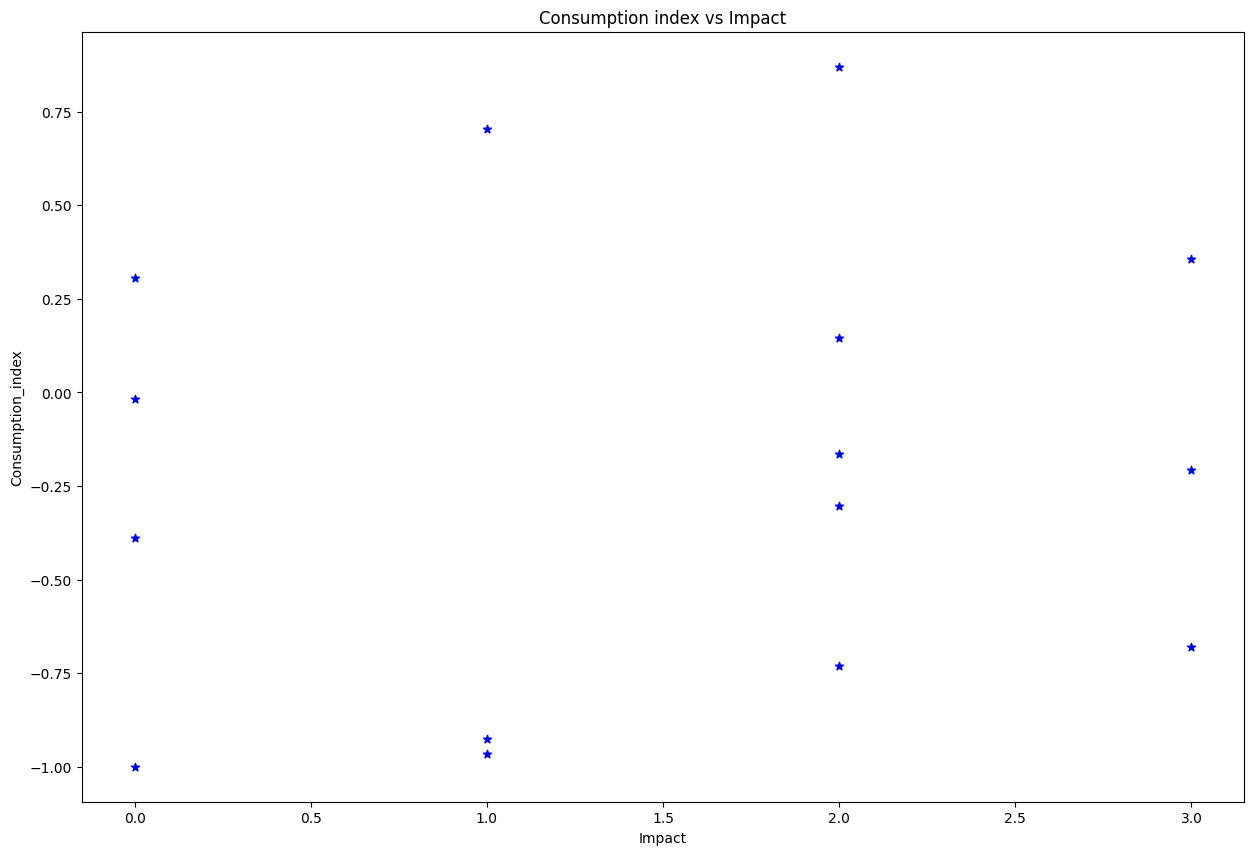

In [ ]:
# specify figure to plot on
plt.figure(figsize=(15,10))
# Obtain x and y arrays
x = df2["Impact"]
y = df2["kll_index"]
# plot the scatterplot
plt.scatter(x,y, color="blue", marker="*")
# add title and labels
plt.title("Consumption index vs Impact")
plt.xlabel("Impact")
plt.ylabel("Consumption_index")

Text(0, 0.5, 'Target')

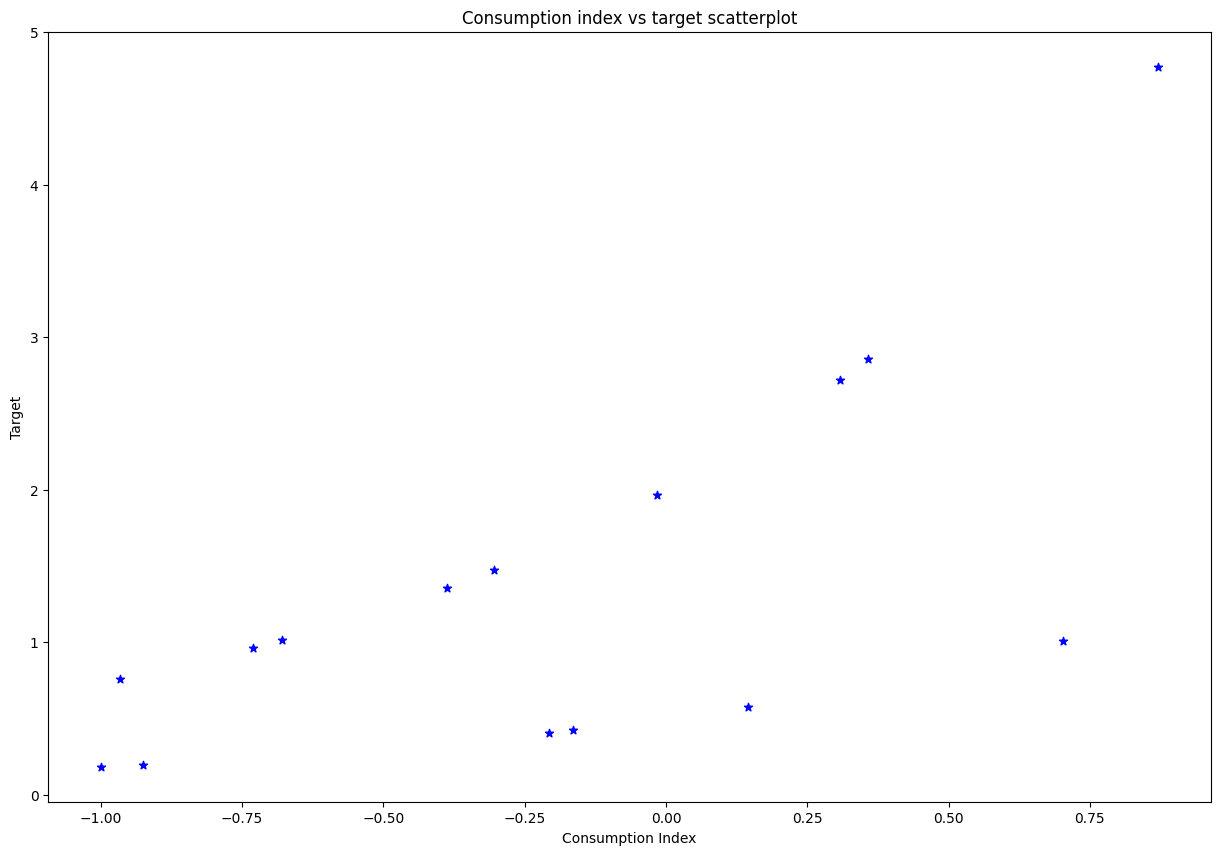

In [ ]:
# create a correlated variable
df2["y"] = df2["kll_index"].apply(lambda x: np.exp(x)*2 if np.random.uniform(-1,1) < 0 else np.exp(x)/2)
# specify figure to plot on
plt.figure(figsize=(15,10))
# Obtain x and y arrays
x = df2["kll_index"]
y = df2["y"]
# plot the scatterplot
plt.scatter(x,y, color="blue", marker="*")
# add title and labels
plt.title("Consumption index vs target scatterplot")
plt.xlabel("Consumption Index")
plt.ylabel("Target")

Text(0, 0.5, 'Target')

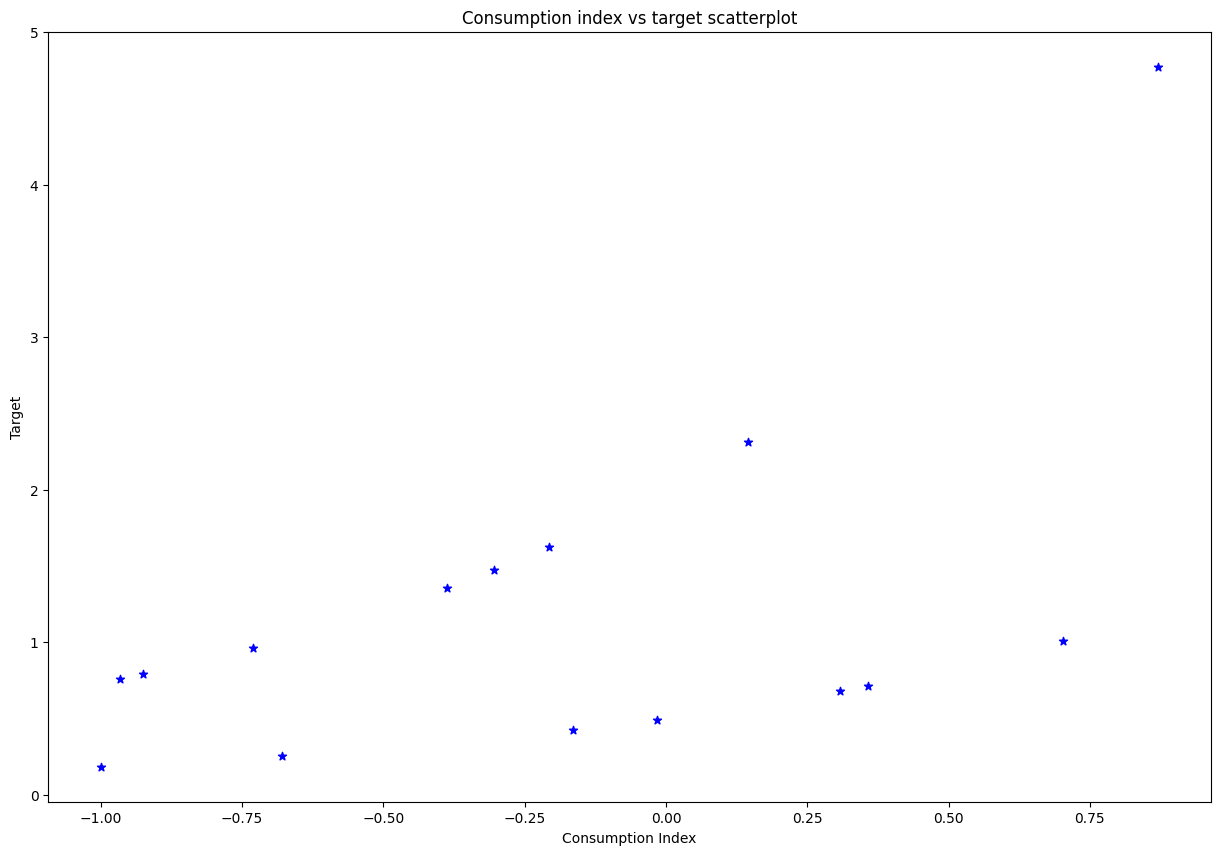

In [ ]:
# create a correlated variable
df2["y"] = df2["kll_index"].apply(lambda x: np.exp(x)*2 if np.random.uniform(-1,1) < 0 else np.exp(x)/2)
# specify figure to plot on
plt.figure(figsize=(15,10))
# Obtain x and y arrays
x = df2["kll_index"]
y = df2["y"]
# plot the scatterplot
plt.scatter(x,y, color="blue", marker="*")
# add title and labels
plt.title("Consumption index vs target scatterplot")
plt.xlabel("Consumption Index")
plt.ylabel("Target")

<ipython-input-99-603081f2211f>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "--o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x,y2, '--o', color="blue", marker="o")


Text(0, 0.5, 'Target')

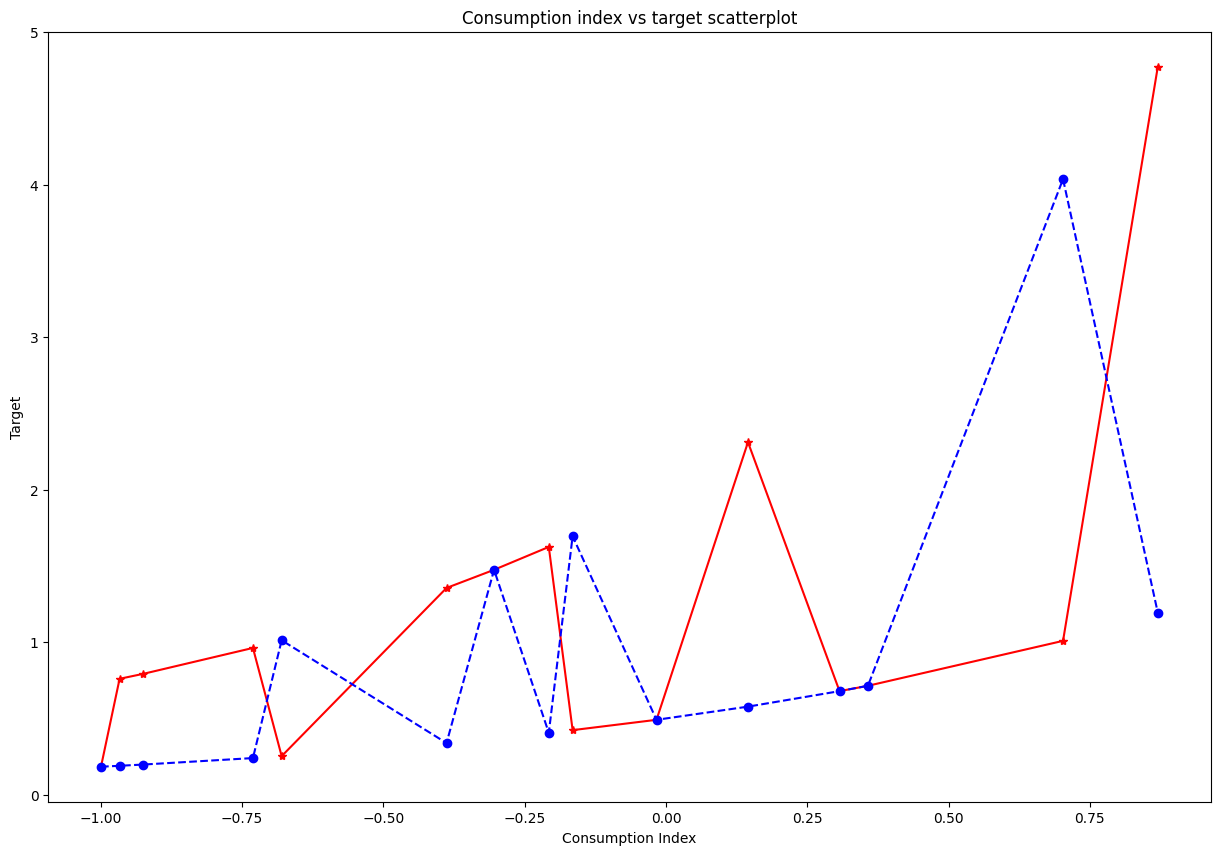

In [ ]:
# some new data
df2["y2"] = df2["kll_index"].apply(lambda x: np.exp(x)*2 if np.random.uniform(-0.5,2) < 0 else np.exp(x)/2)

# specify figure to plot on
plt.figure(figsize=(15,10))

# Obtain x and y arrays
x = df2["kll_index"]
y1 = df2["y"]
y2 = df2["y2"]

# plot the scatterplot
plt.plot(x,y1, color="red", marker="*")
plt.plot(x,y2, '--o', color="blue", marker="o")

# add title and labels
plt.title("Consumption index vs target scatterplot")
plt.xlabel("Consumption Index")
plt.ylabel("Target")

In [ ]:
df_agg

EDX  Impact  kll_index
0    LX       2  -1.303967
1    MX       5  -0.227992
2    NA       6  -1.591633
3  PSOX       7   0.852342
4    TY       2  -0.730875

<Figure size 640x480 with 0 Axes>

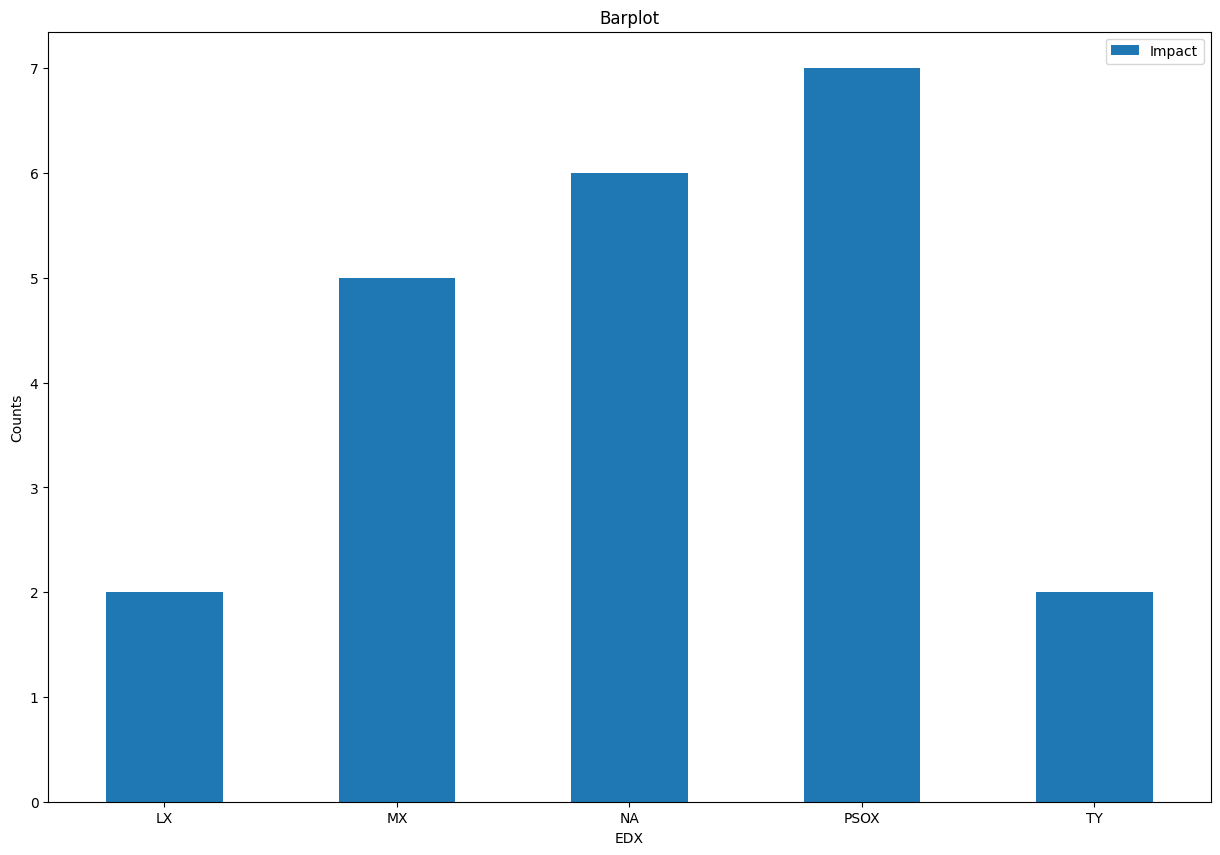

In [ ]:
plt.figure()
ax = df_agg.plot.bar(x='EDX',
                     y='Impact',
                     rot=0,
                     figsize=(15,10))
plt.title("Barplot")
plt.xlabel("EDX")
plt.ylabel("Counts")
plt.show()

# Seaborn

<Axes: xlabel='EDX'>

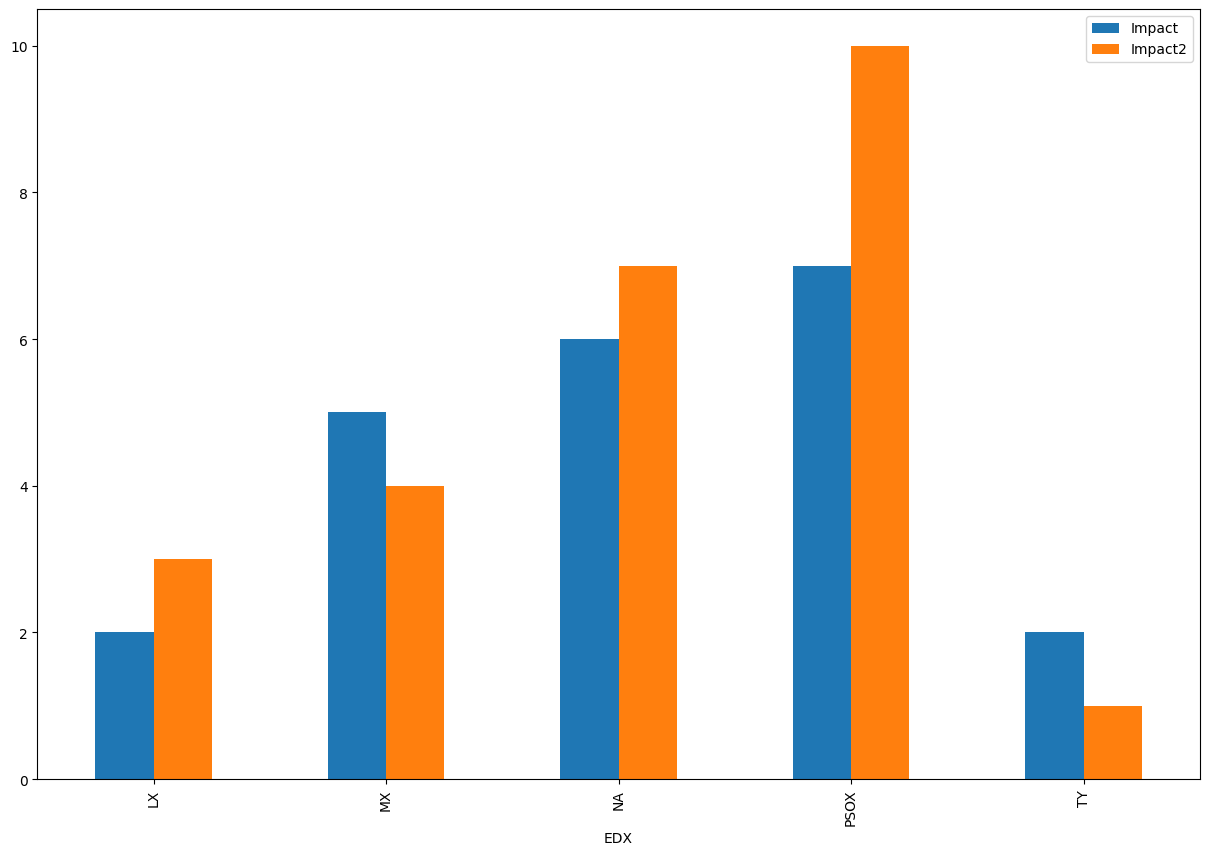

In [ ]:
# Other counts
df_agg["Impact2"] = [3,4,7,10,1] # add new data
df_bar = df_agg[["EDX","Impact","Impact2"]]  # subset relevant columns
df_bar.set_index("EDX", inplace=True)  # update index for plotting
df_bar.plot.bar(figsize=(15,10))  # barplot

<Axes: ylabel='Impact'>

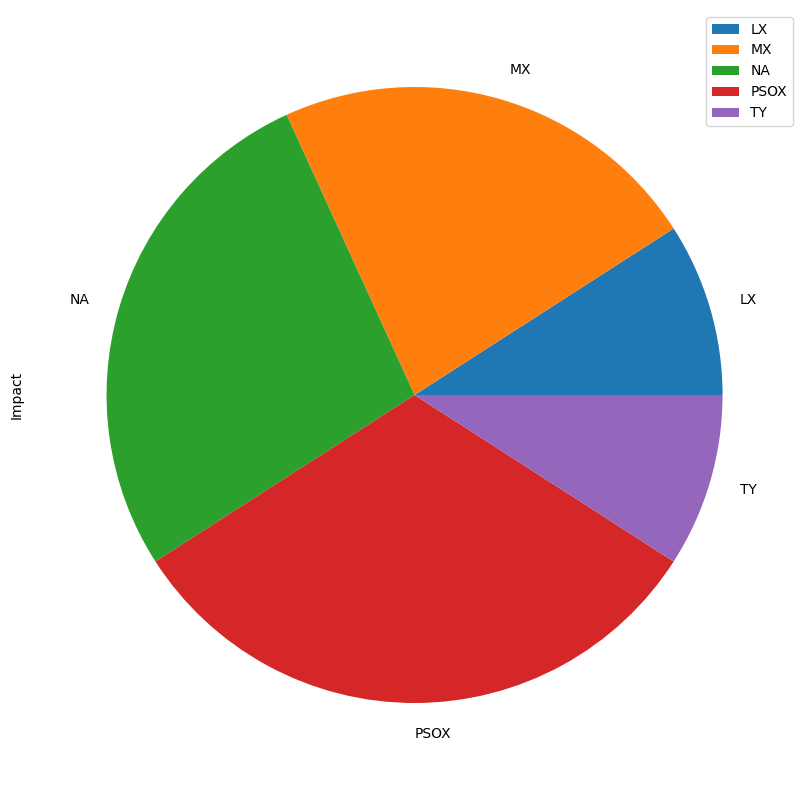

In [ ]:
# pie chart for one target
df_bar.plot.pie(y='Impact',figsize=(15,10))

array([<Axes: ylabel='Impact'>, <Axes: ylabel='Impact2'>], dtype=object)

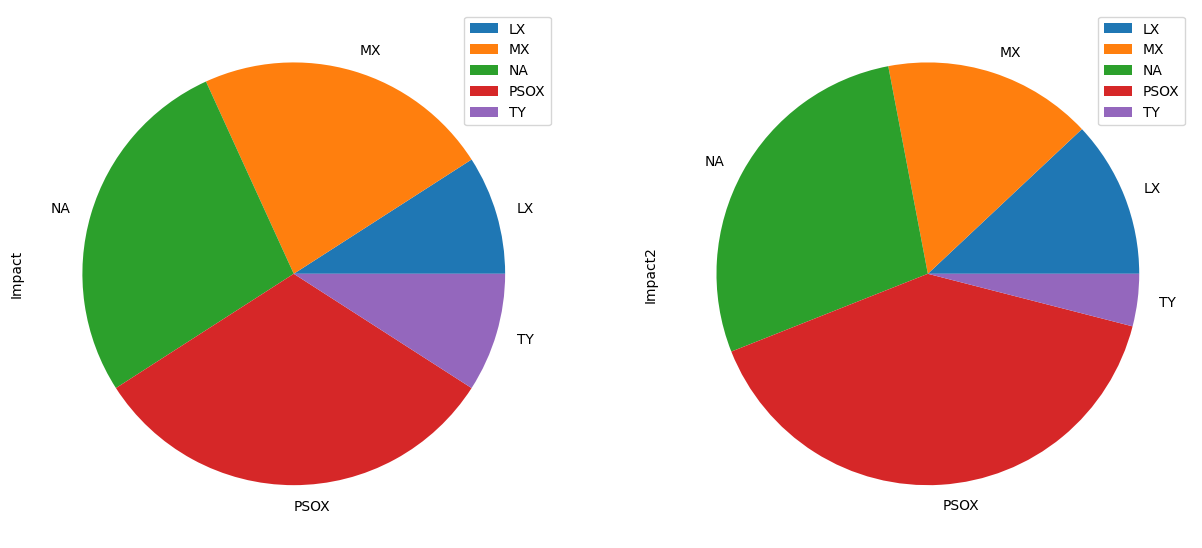

In [ ]:
# Two targets
df_bar.plot.pie(figsize=(15,10), subplots=True)  # barplot

In [ ]:
# Load preset Tip dataset \
tips_df = sns.load_dataset("tips")
tips_df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

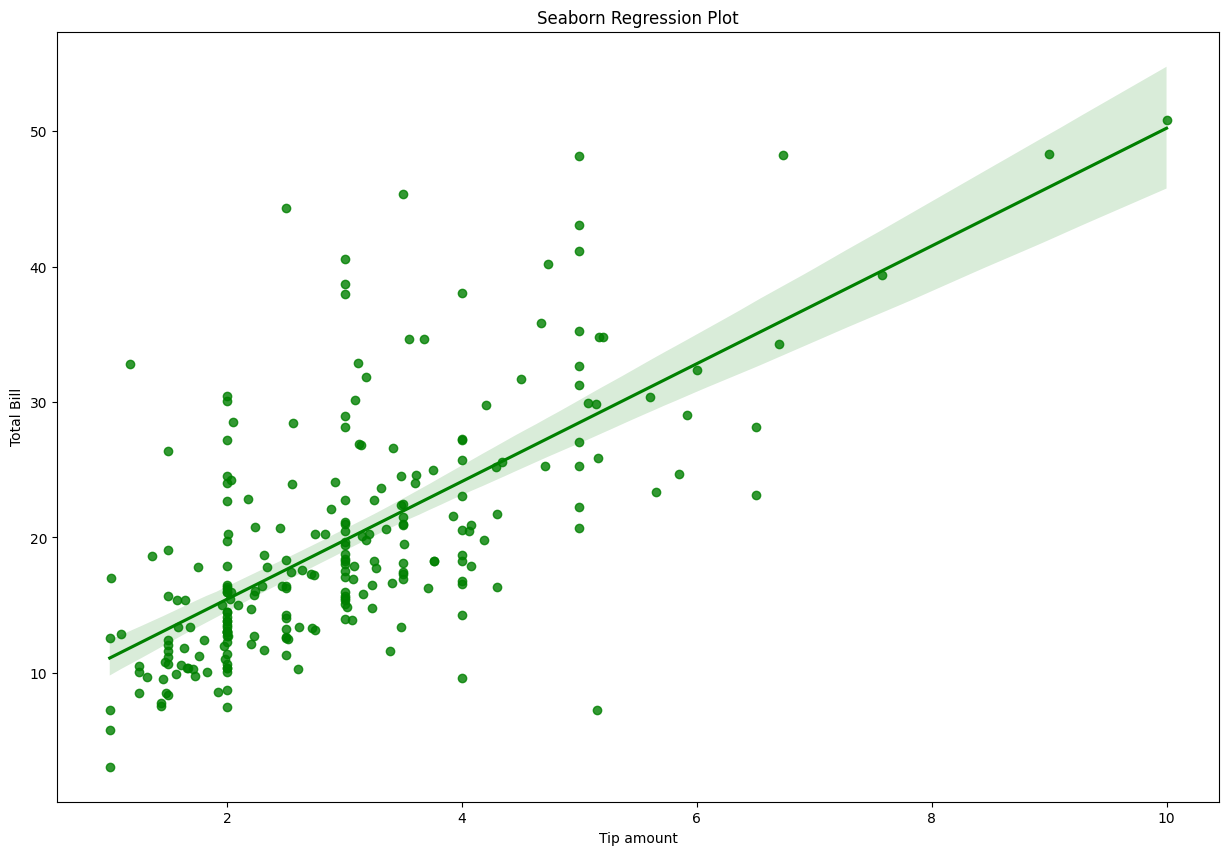

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(x="tip",
            y="total_bill",
            color="g",
            data=tips_df)
plt.title("Seaborn Regression Plot")
plt.ylabel("Total Bill")
plt.xlabel("Tip amount")
plt.show()

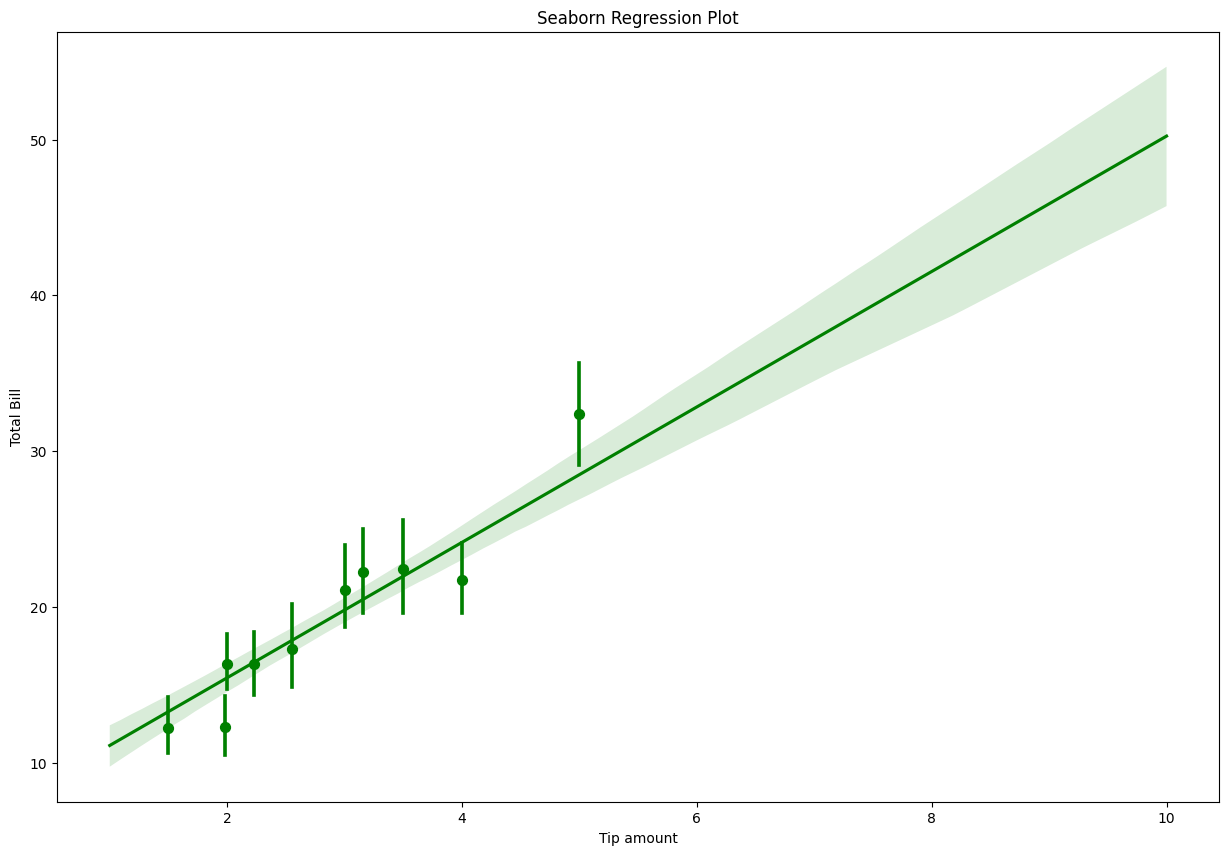

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(x="tip",
            y="total_bill",
            color="g",
            x_bins=10,
            data=tips_df)
plt.title("Seaborn Regression Plot")
plt.ylabel("Total Bill")
plt.xlabel("Tip amount")
plt.show()

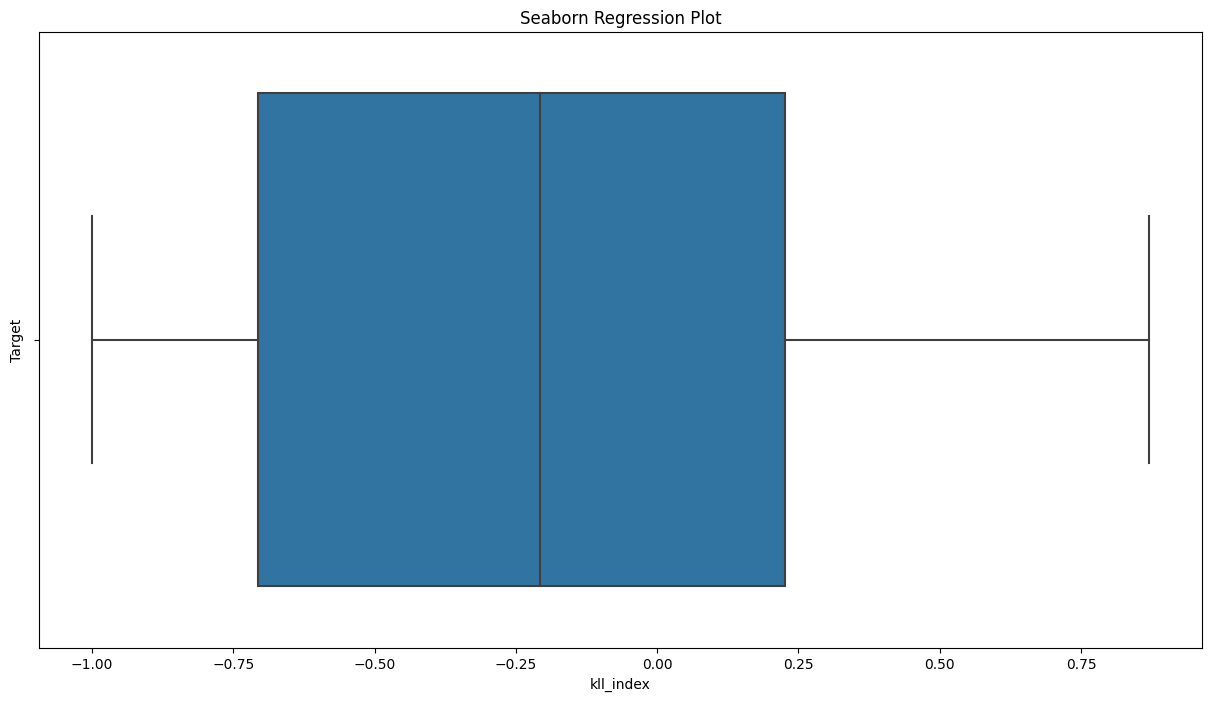

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="kll_index",data=df2)
plt.title("Seaborn Regression Plot")
plt.ylabel("Target")
plt.show()

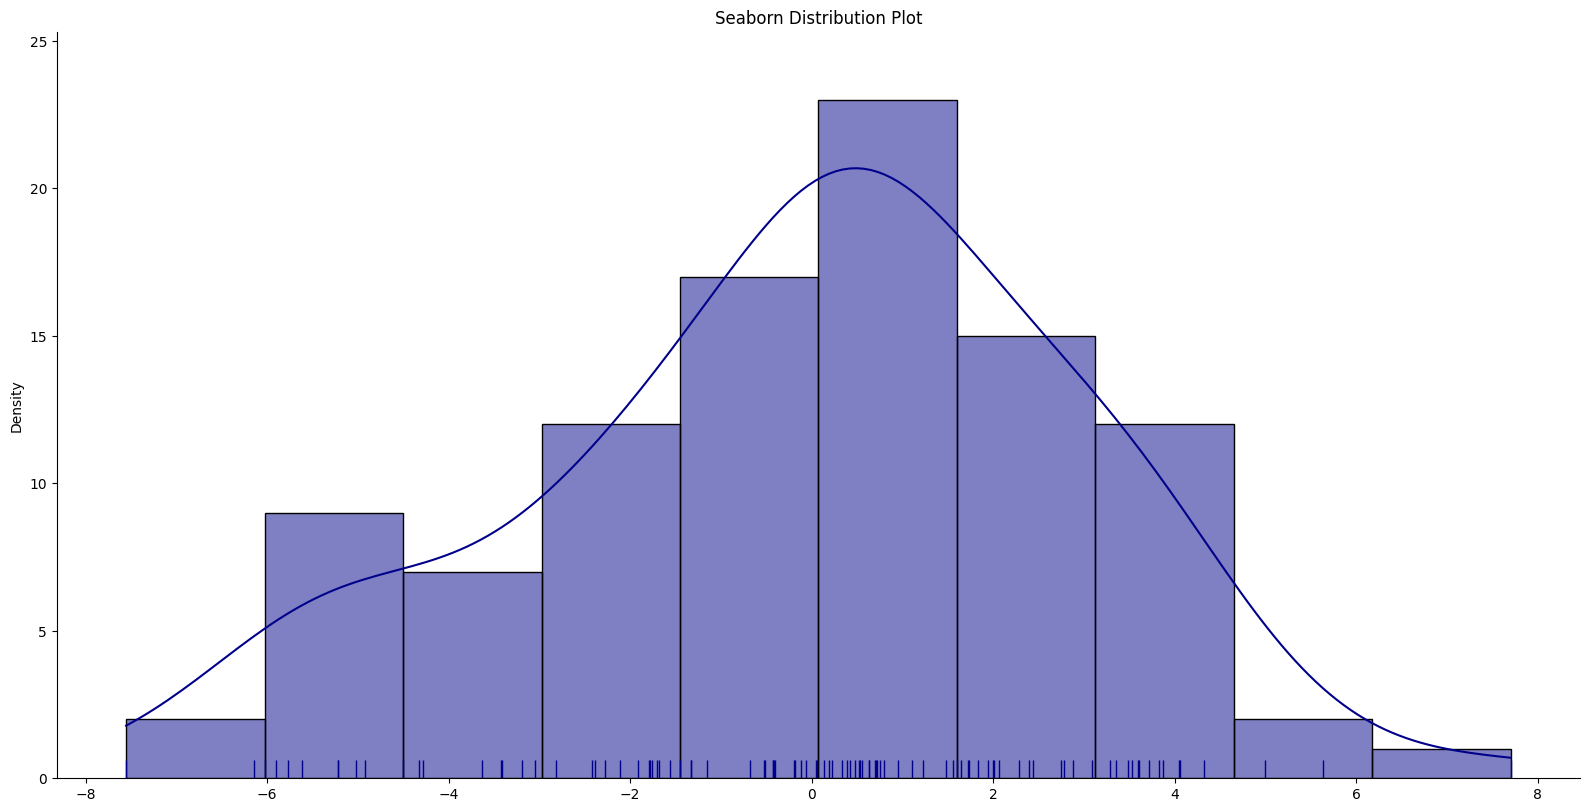

In [ ]:
normal_data = np.random.normal(0, 3, 100)
ax = sns.displot(normal_data,
                 kde=True, # Use kernel density estimation
                 rug=True, # show location of points
                 bins=10, # number of histogram bins
                 height=8 , # determines plot figure
                 aspect=2,
                 color="darkblue"
                )
plt.ylabel("Density")
plt.title("Seaborn Distribution Plot")
plt.show()

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.dropna(subset=["bill_length_mm","flipper_length_mm"]) # minor cleaning
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

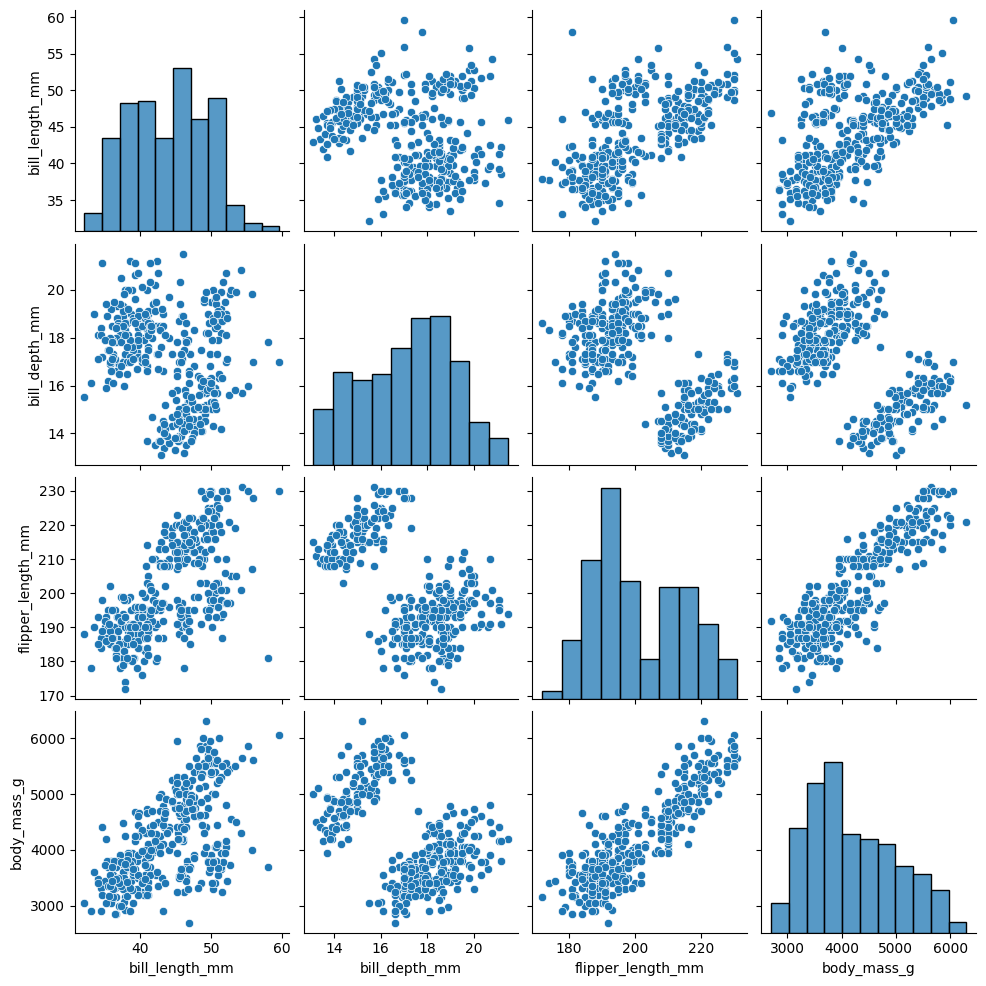

In [ ]:

sns.pairplot(penguins)

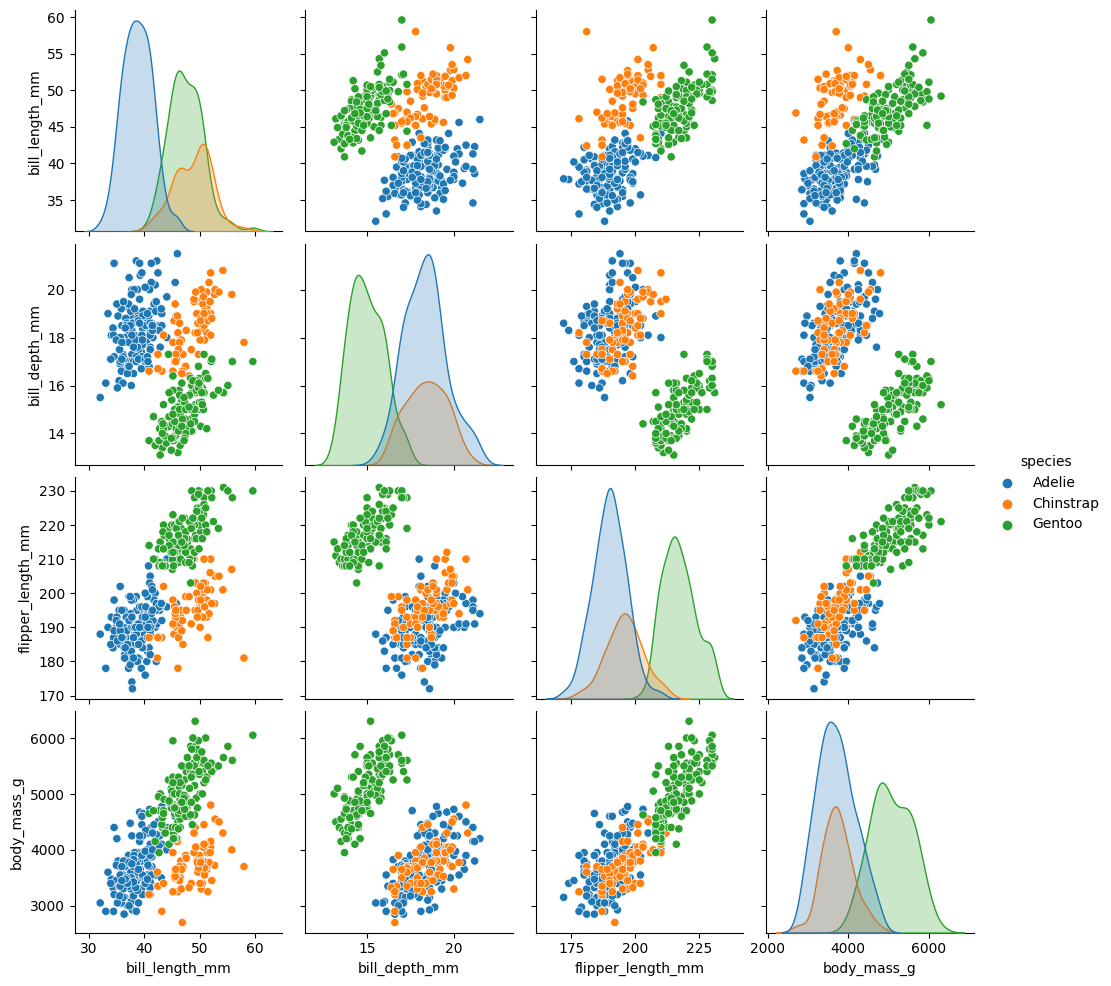

In [ ]:
sns.pairplot(penguins, hue="species")

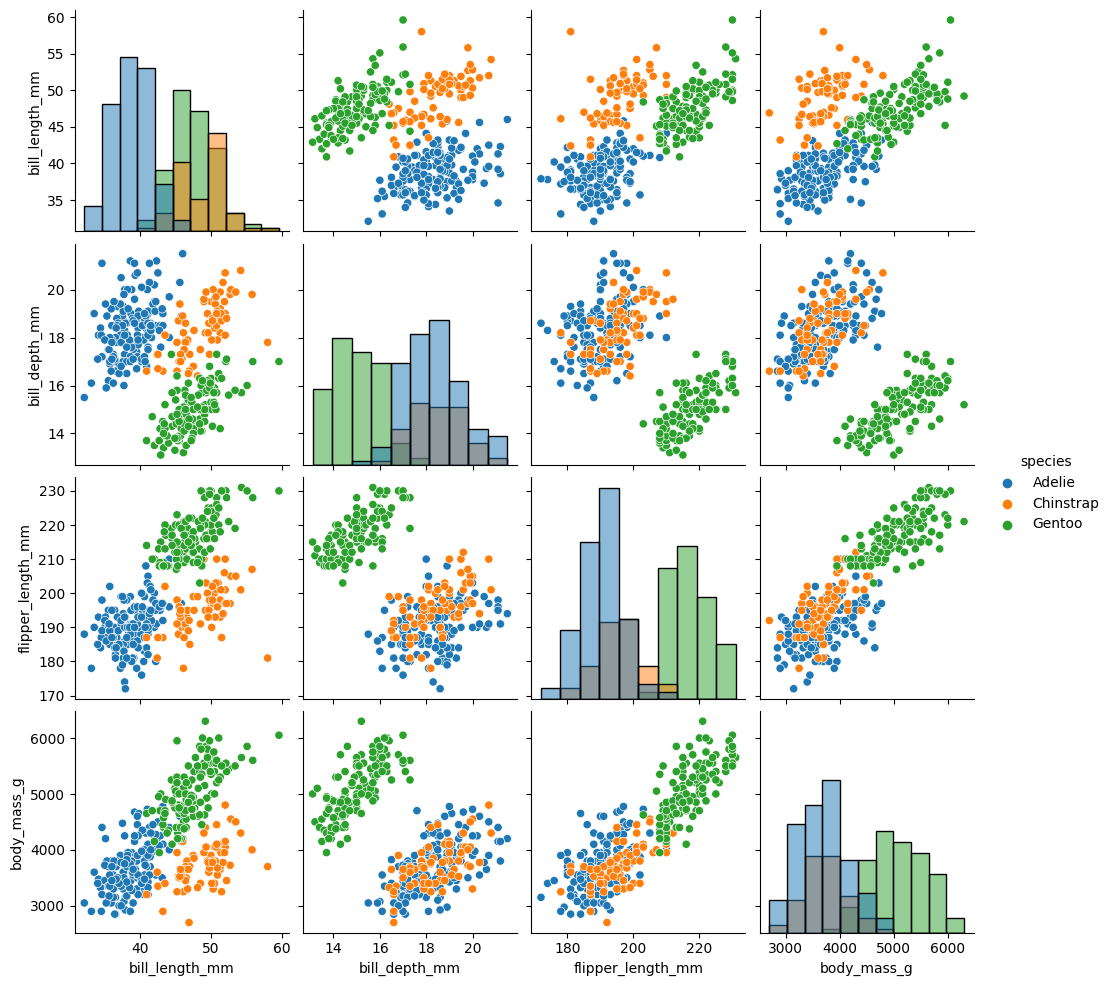

In [ ]:
sns.pairplot(penguins, hue="species", diag_kind="hist")

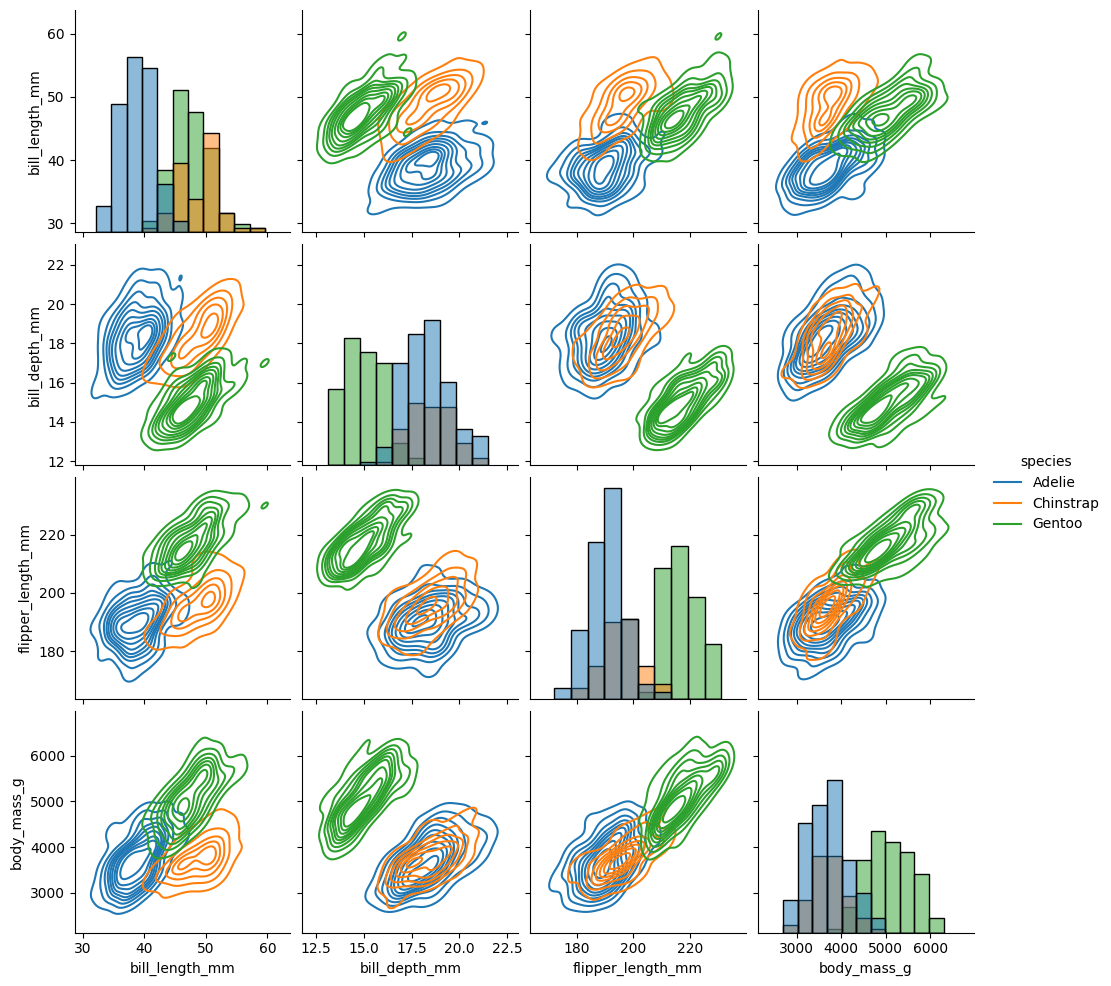

In [ ]:
sns.pairplot(penguins, hue="species", kind="kde", diag_kind="hist")

<ipython-input-115-7f1bb02f1810>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


Text(0.5, 1.0, 'Correlation Matrix')

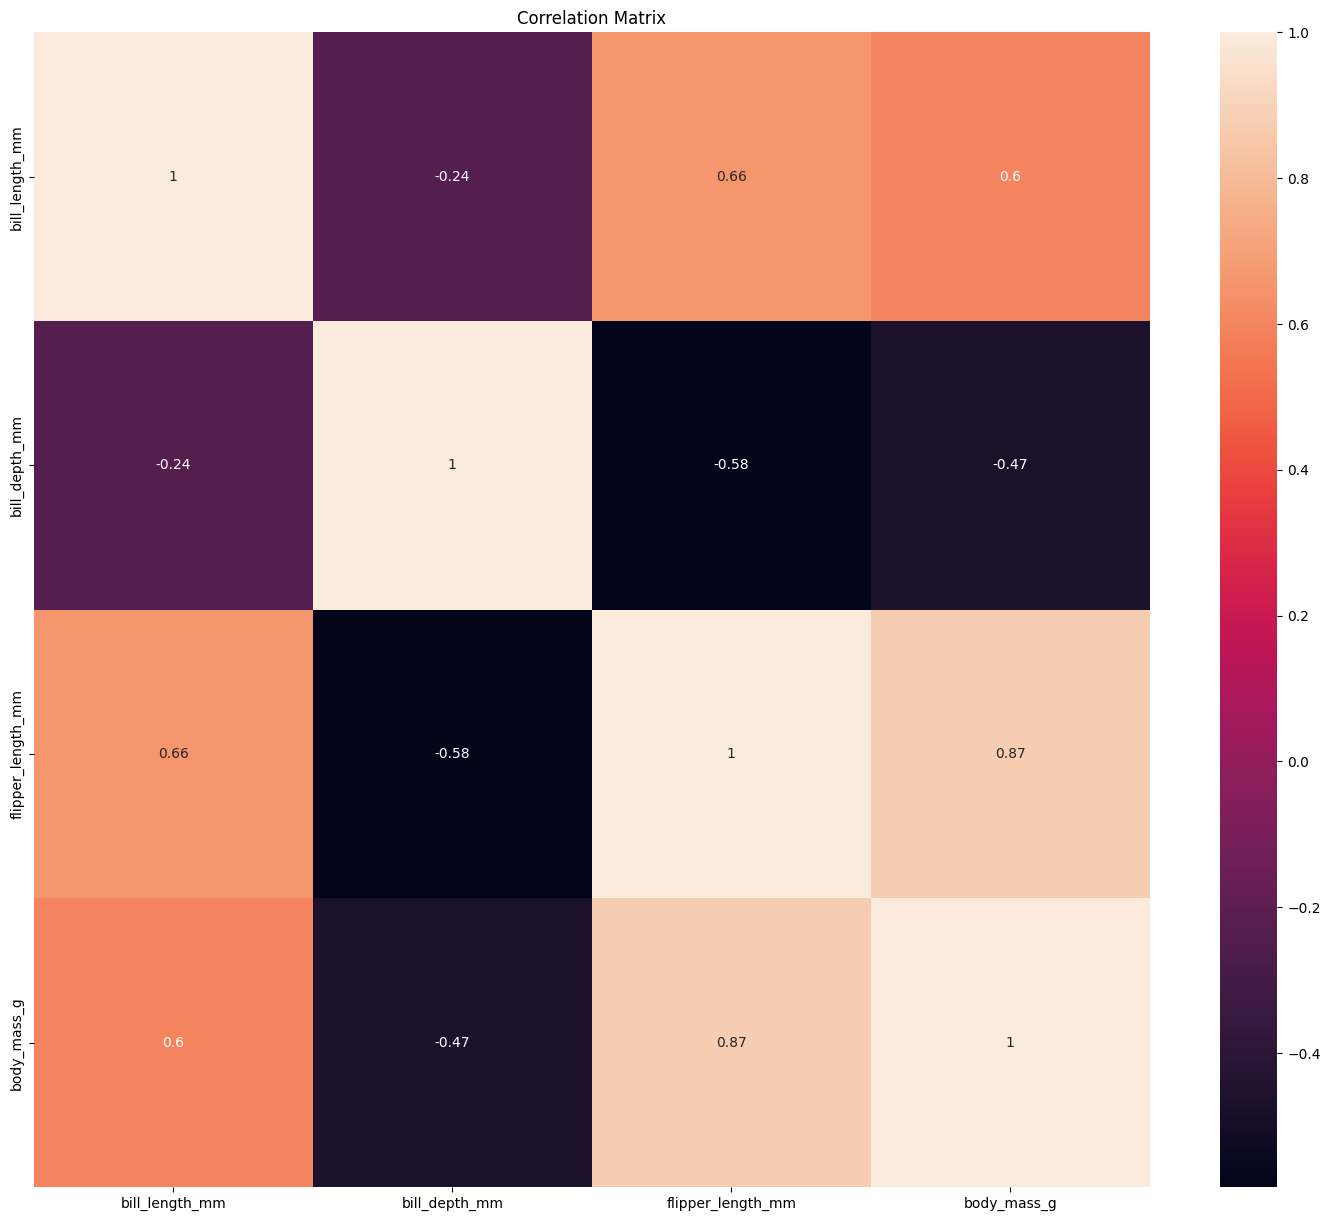

In [ ]:
df = penguins.copy()
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix")

In [ ]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
fmri

subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]

<Axes: xlabel='timepoint', ylabel='signal'>

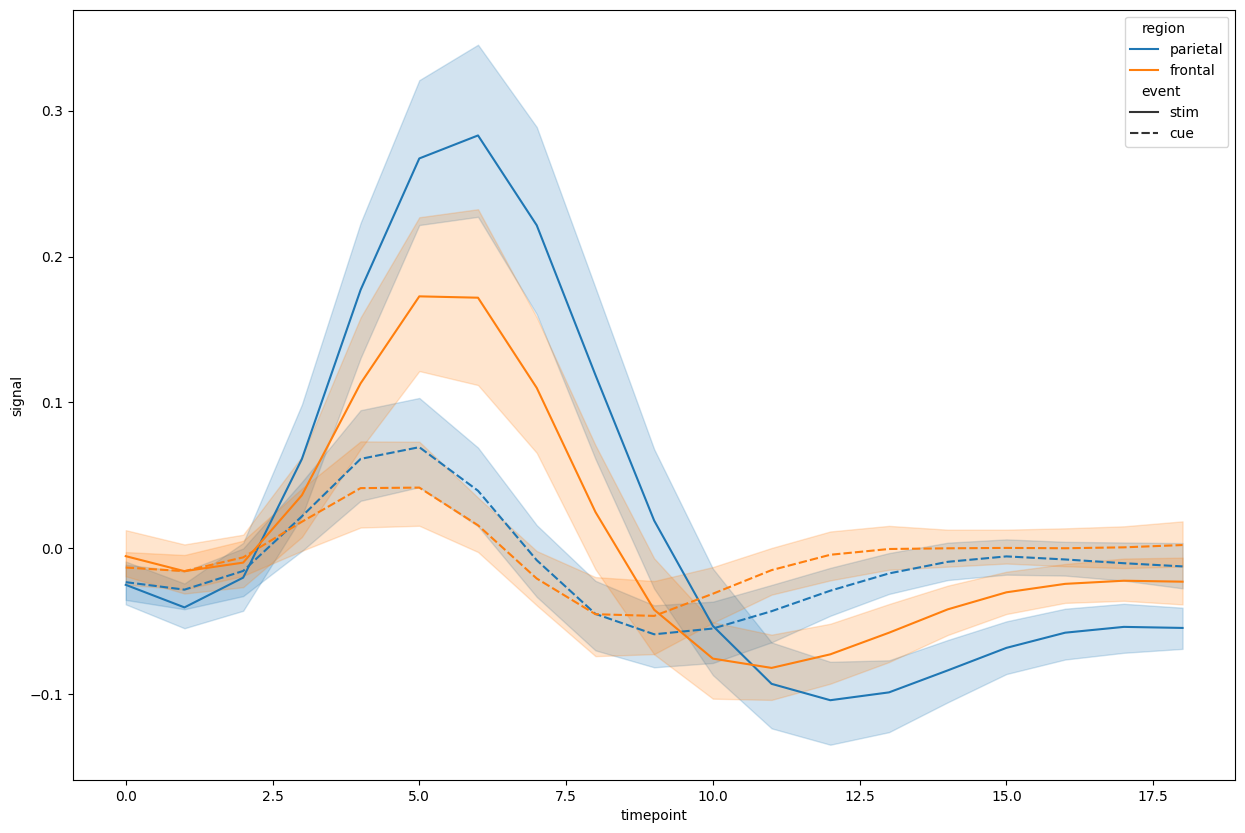

In [ ]:
# Plot the responses for different events and regions
plt.figure(figsize=(15,10))
sns.lineplot(x="timepoint",
             y="signal",
             hue="region",
             style="event",
             data=fmri)